MNIST handwritten Digit Classification

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # openCV library
# from google.colab.patches import cv2_imshow  # present in cv2 however google restrictions does not allow to use it directly (only for colab)
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(27)  # randomness restricted

2025-03-16 14:31:28.407547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading the MNIST data from keras.datasets

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data("mnist.npz") # preprocesing already done

In [3]:
type(x_train_org) # conversion to numpy also done

numpy.ndarray

In [4]:
x_train_org.shape, y_train_org.shape, x_test_org.shape, y_test_org.shape

# contains 60000 train images
# 10000 test images
# dimensions 28*28
# grey scale images asther is one channel and not 3 in case of RGB

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
print(x_train_org[20])
print(x_train_org[20].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

4


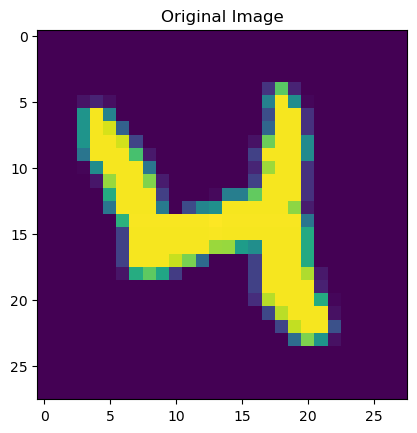

In [6]:
plt.imshow(x_train_org[20])
plt.title("Original Image")
plt.show

print(y_train_org[20])

Image Labels

In [7]:
print(y_train_org.shape, y_test_org.shape)

print(np.unique(y_train_org))
print(np.unique(y_test_org))

(60000,) (10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Inverting the color and creating another dataset 

4


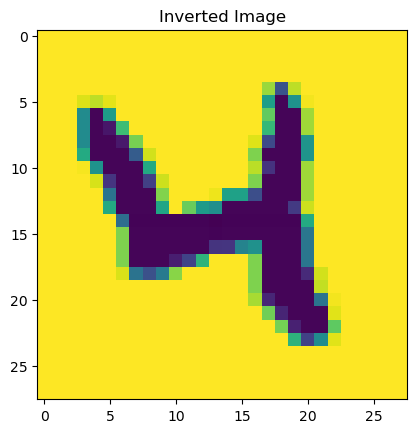

In [8]:
x_train_con = np.array(x_train_org)
x_test_con = np.array(x_test_org)

x_train_inv = (255 - x_train_con).astype(np.uint8)
x_test_inv = (255 - x_test_con).astype(np.uint8)
y_train_inv = y_train_org
y_test_inv = y_test_org

print(y_train_inv[20])
plt.imshow(x_train_inv[20])
plt.title("Inverted Image")
plt.show()

In [9]:
np.savez("mnist_inverted.npz",
         x_train=x_train_inv, y_train=y_train_inv,
         x_test=x_test_inv, y_test=y_test_inv)

x_train_inv.shape, y_train_inv.shape, x_test_inv.shape, y_test_inv.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Merging the dataets

In [10]:
x_train = np.concatenate((x_train_org, x_train_inv), axis=0)
y_train = np.concatenate((y_train_org, y_train_inv), axis=0)  

x_test = np.concatenate((x_test_org, x_test_inv), axis=0)
y_test = np.concatenate((y_test_org, y_test_inv), axis=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120000, 28, 28), (120000,), (20000, 28, 28), (20000,))

normaliizing the scale

In [11]:
x_train = x_train/255
x_test = x_test/255

print(x_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
x_train = tf.image.per_image_standardization(x_train)
x_test = tf.image.per_image_standardization(x_test)

2025-03-16 14:31:34.993525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model Training (Neural Network)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # cannot input a 2-D array therefore it must be linearized into a line
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1(l1=0.0001)),
    keras.layers.Dense(56, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001)),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [148]:
model_cnn = keras.Sequential()

model_cnn.add(keras.layers.Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)))
model_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model_cnn.add(keras.layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model_cnn.add(keras.layers.Flatten())

model_cnn.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1(l1=0.0001)))
model_cnn.add(keras.layers.Dropout(0.5))

model_cnn.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model_cnn.add(keras.layers.Dropout(0.25))

model_cnn.add(keras.layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [149]:
model_cnn.fit(x_train, y_train, epochs=10) 

Epoch 1/10
3750/3750 [==============================] - 61s 16ms/step - loss: 0.4731 - accuracy: 0.8604
Epoch 2/10
3750/3750 [==============================] - 60s 16ms/step - loss: 0.2056 - accuracy: 0.9522
Epoch 3/10
3750/3750 [==============================] - 60s 16ms/step - loss: 0.1702 - accuracy: 0.9613
Epoch 4/10
3750/3750 [==============================] - 61s 16ms/step - loss: 0.1523 - accuracy: 0.9674
Epoch 5/10
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1400 - accuracy: 0.9705
Epoch 6/10
3750/3750 [==============================] - 52s 14ms/step - loss: 0.1312 - accuracy: 0.9728
Epoch 7/10
3750/3750 [==============================] - 61s 16ms/step - loss: 0.1260 - accuracy: 0.9732
Epoch 8/10
3750/3750 [==============================] - 54s 15ms/step - loss: 0.1208 - accuracy: 0.9750
Epoch 9/10
3750/3750 [==============================] - 58s 15ms/step - loss: 0.1148 - accuracy: 0.9763
Epoch 10/10
3750/3750 [==============================] - 57s 15m

Model Evaluation

In [150]:
loss, accuracy = model_cnn.evaluate(x_test, y_test)  # our model is not overfitting, as the accuracy on the test data is also high
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

625/625 [==============================] - 3s 4ms/step - loss: 0.0782 - accuracy: 0.9872
Loss: 0.0782117024064064
Accuracy: 0.9871500134468079


taking one individual value

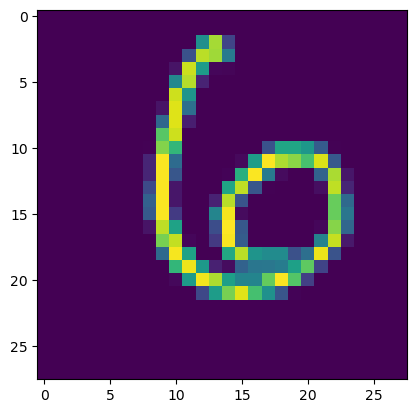

In [18]:
plt.imshow(x_test[100])
plt.show()

In [145]:
print(f"Actual Value: [{y_test[100]}]")

pred_100 = model_cnn.predict(x_test)[100]

print(f"Predicted Value: {pred_100}")
# output is probabilty of the 10 available classes ie 0-9
# position with the highest value indicates the prediction with highest probability
print(f"Predicted Answer: {np.argmax(pred_100)}")

Actual Value: [6]
625/625 [==============================] - 2s 4ms/step
Predicted Value: [8.1927248e-10 5.1701787e-19 1.4549637e-21 3.7249705e-15 1.9254922e-14
 6.6866352e-07 9.9999928e-01 2.8326546e-28 6.5357114e-10 4.8875680e-17]
Predicted Answer: 6


Confusion Matrix

In [151]:
y_prediction = model_cnn.predict(x_test)

#y_pred_ans = []
#for i in range (len(y_prediction)):
#  ans = np.argmax(y_prediction[i])
#  y_pred_ans.append(ans)

y_pred_ans = [np.argmax(i) for i in y_prediction]
conf_mat = confusion_matrix(y_test, y_pred_ans)

#print(y_pred_ans)
print(conf_mat)

625/625 [==============================] - 2s 4ms/step
tf.Tensor(
[[1952    0    0    0    0    0    6    2    0    0]
 [   0 2253    3    2    0    5    0    6    1    0]
 [   2    2 2035    3    4    0    3   12    3    0]
 [   1    0    3 1987    0   14    0   13    1    1]
 [   0    0    0    0 1939    0    1    3    2   19]
 [   3    1    0    9    0 1763    3    2    2    1]
 [  15    5    0    0    1    5 1889    0    1    0]
 [   0    5    8    1    0    0    0 2038    0    4]
 [   7    0    6    5    3    2    3    7 1898   17]
 [   3    0    0    2   11    1    0    6    6 1989]], shape=(10, 10), dtype=int32)


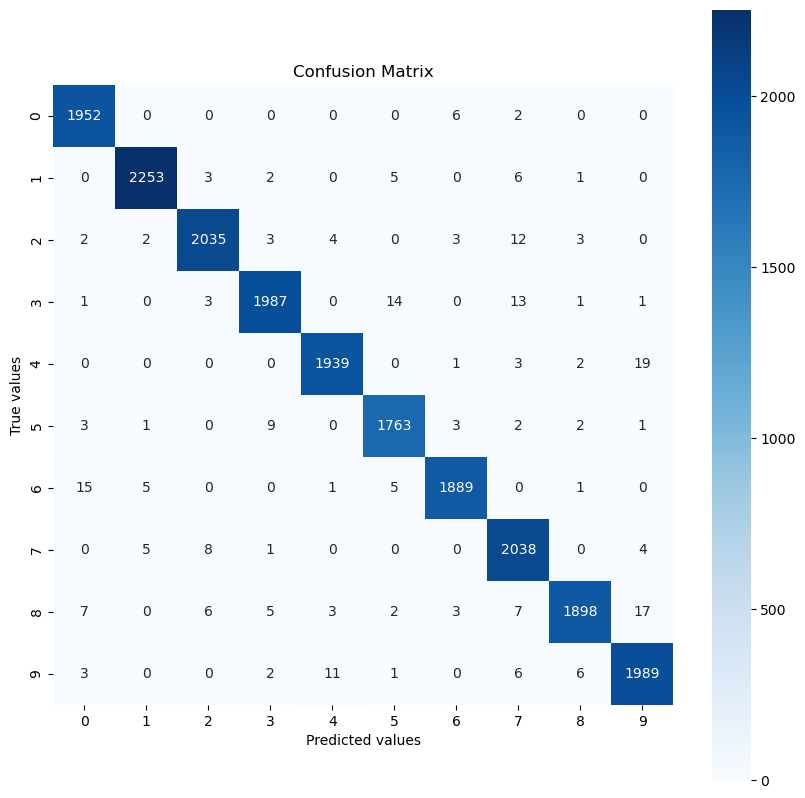

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', square=True)   # fmt='d' indicates that all values shouild be in integers
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()

Building a predictive System

In [122]:
input1_img_path = 'Test_images/IMG_9.jpeg'

input1_img = cv2.imread(input1_img_path)

In [123]:
print(type(input1_img))
print(input1_img.shape) # read in as RGB image

<class 'numpy.ndarray'>
(312, 340, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

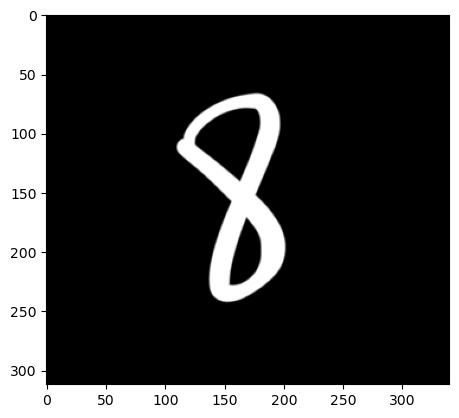

In [124]:
#cv2_imshow('Image', input1_img)  # for colab

#cv2.imshow('Image', input1_img) # for jupyter notebook using imshow
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(input1_img)   # for jupyter notebook
plt.show

In [125]:
input1_greyscale_img = cv2.cvtColor(input1_img, cv2.COLOR_RGB2GRAY)   # converting RGB to greyscale
input1_greyscale_img.shape

(312, 340)

In [126]:
input1_img_resize = cv2.resize(input1_greyscale_img, (28,28))      # resizing the image as pre input of our NN
input1_img_resize.shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

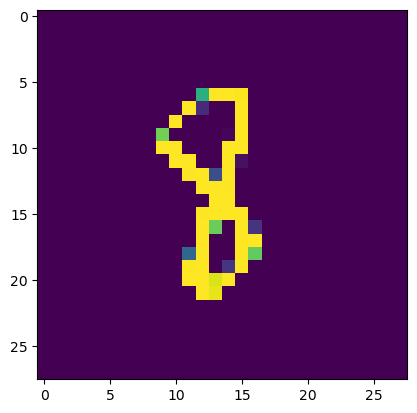

In [127]:
#cv2_imshow(input1_img_resize) # colab

plt.imshow(input1_img_resize)   # for jupyter notebook
plt.show

In [128]:
input1_image_resized = input1_img_resize/255   # normalization like before

In [129]:
image1_reshaped = np.reshape(input1_image_resized, [1,28,28])
# this indicates that we are only one image as input

In [130]:
input1_prediction = model_cnn.predict(image1_reshaped)
print(input1_prediction)
print(f"Predicted value: {np.argmax(input1_prediction)}")

1/1 [==============================] - 0s 38ms/step
[[7.2933341e-05 1.4498324e-05 2.5443445e-04 2.3896551e-04 3.4735123e-05
  1.3621325e-03 9.7589640e-05 1.1637666e-06 9.9753881e-01 3.8471512e-04]]
Predicted value: 8


Creating a System

In [153]:
#input_path = input("Enter path of the image: ")

def img_classify(path):
    img = cv2.imread(path)
    grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resize = cv2.resize(grey, (28,28))
    norm = resize/255
    reshape = np.reshape(norm, [1,28,28])
    pred = model_cnn.predict(reshape)
    return np.argmax(pred)
    #print(f"the handwritten image is: {np.argmax(pred)}")

#img_classify(input_path)

import os

file_path = "/Users/safwanshaikh/Downloads/AML/MNIST-Digit-Classification/Test_images/"

# Loop from 1 to 34 (inclusive)
for i in range(1, 35):  
    file = os.path.join(file_path, f"IMG_{i}.jpeg")  # Correct filename format
    
    # Call your function and get the output
    result = img_classify(file)
    
    # Print or store results
    print(f"IMG_{i}.jpeg -> {result}")
    

1/1 [==============================] - 0s 124ms/step
IMG_1.jpeg -> 0
1/1 [==============================] - 0s 26ms/step
IMG_2.jpeg -> 1
1/1 [==============================] - 0s 25ms/step
IMG_3.jpeg -> 7
1/1 [==============================] - 0s 27ms/step
IMG_4.jpeg -> 7
1/1 [==============================] - 0s 25ms/step
IMG_5.jpeg -> 3
1/1 [==============================] - 0s 28ms/step
IMG_6.jpeg -> 5
1/1 [==============================] - 0s 27ms/step
IMG_7.jpeg -> 5
1/1 [==============================] - 0s 31ms/step
IMG_8.jpeg -> 2
1/1 [==============================] - 0s 25ms/step
IMG_9.jpeg -> 8
1/1 [==============================] - 0s 25ms/step
IMG_10.jpeg -> 9
1/1 [==============================] - 0s 28ms/step
IMG_11.jpeg -> 1
1/1 [==============================] - 0s 28ms/step
IMG_12.jpeg -> 7
1/1 [==============================] - 0s 29ms/step
IMG_13.jpeg -> 1
1/1 [==============================] - 0s 31ms/step
IMG_14.jpeg -> 2
1/1 [==============================] - 0s 